# Skytrax Webscrapping Project Data Cleanup

This is a continuation of the Skytrax webscrapping project I did in a separate notebook. This will be focused on cleaning up the exported data.

In [1]:
# Importing packages
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
# Importing data
cathay_df = pd.read_csv('cathay_data.csv')
cathay_df.head()

,airline,overall_rating,review_title,reviewer_location,review_date,trip_verified,review_body,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,cathay-pacific-airways,10,“business class seats are very comfortable”,Hong Kong,6th July 2024,Trip Verified,The flight was completely occupied in the busi...,Boeing 777,Business,Business Class,Bangkok to Hong Kong,June 2024,5.0,5.0,5.0,5.0,5.0,4.0,4,yes
1,cathay-pacific-airways,1,"""flight was ineligible for mileage""",United States,20th May 2024,Trip Verified,I booked this airline specifically to obtain f...,NaN,Business,Economy Class,Los Angeles to Hong Kong,March 2024,1.0,3.0,3.0,3.0,3.0,NaN,1,no
2,cathay-pacific-airways,9,"""food and beverage was great""",Guadeloupe,15th May 2024,Not Verified,The food and beverage was great and gave my ch...,NaN,Family Leisure,Economy Class,Hong Kong to London,April 2024,5.0,5.0,5.0,5.0,5.0,5.0,3,yes
3,cathay-pacific-airways,1,"""forced to purchase a new return ticket""",Singapore,7th May 2024,Trip Verified,I had an incredibly frustrating experience tra...,A350-900,Couple Leisure,Economy Class,Hong Kong to Singapore,May 2024,3.0,3.0,3.0,3.0,1.0,4.0,1,no
4,cathay-pacific-airways,5,"""unsatisfactory travel experience""",Hong Kong,4th May 2024,Trip Verified,Overall an unsatisfactory travel experience. M...,NaN,Business,Economy Class,Singapore to Hong Kong,May 2024,3.0,4.0,3.0,4.0,4.0,NaN,2,no


Overall I think the data is quite clean but there are a few changes that I want to make. They are the following based on simplicity:

1. Make the columns all lower case and fix the naming
2. Change all the quantitative review values to ints
3. Split the Route column into three sections. Departure, Destination, and whether the flight had a layover in Hong Kong
4. Cleanup the aircraft column.

### Changing the column names and data type

Since these two steps are quick, I will combine them together.

In [3]:
# Fixing column names
cathay_df.columns = cathay_df.columns.str.lower()
cathay_df.columns = cathay_df.columns.str.replace(' ', '_')
# Changing review data types
review_number_col = ['seat_comfort','cabin_staff_service', 'food_&_beverages', 
                     'inflight_entertainment', 'ground_service', 'wifi_&_connectivity']
cathay_df[review_number_col] = cathay_df[review_number_col].astype('Int64')
cathay_df.head()

,airline,overall_rating,review_title,reviewer_location,review_date,trip_verified,review_body,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,ground_service,wifi_&_connectivity,value_for_money,recommended
0,cathay-pacific-airways,10,“business class seats are very comfortable”,Hong Kong,6th July 2024,Trip Verified,The flight was completely occupied in the busi...,Boeing 777,Business,Business Class,Bangkok to Hong Kong,June 2024,5,5,5,5,5,4,4,yes
1,cathay-pacific-airways,1,"""flight was ineligible for mileage""",United States,20th May 2024,Trip Verified,I booked this airline specifically to obtain f...,NaN,Business,Economy Class,Los Angeles to Hong Kong,March 2024,1,3,3,3,3,<NA>,1,no
2,cathay-pacific-airways,9,"""food and beverage was great""",Guadeloupe,15th May 2024,Not Verified,The food and beverage was great and gave my ch...,NaN,Family Leisure,Economy Class,Hong Kong to London,April 2024,5,5,5,5,5,5,3,yes
3,cathay-pacific-airways,1,"""forced to purchase a new return ticket""",Singapore,7th May 2024,Trip Verified,I had an incredibly frustrating experience tra...,A350-900,Couple Leisure,Economy Class,Hong Kong to Singapore,May 2024,3,3,3,3,1,4,1,no
4,cathay-pacific-airways,5,"""unsatisfactory travel experience""",Hong Kong,4th May 2024,Trip Verified,Overall an unsatisfactory travel experience. M...,NaN,Business,Economy Class,Singapore to Hong Kong,May 2024,3,4,3,4,4,<NA>,2,no


### Splitting up the route column

Next I want to split up the route column to be departure location, destination location and whether or not it was a layover flight in Hong Kong. To do this I wrote a function that will split the route and return it so we can replace the original column.

In [4]:
def route_split(route):
    # Check if the flight has a layover
    flight_split = route.split(' via ')
    # Split the flight by departure and destination
    main_route = flight_split[0].split(' to ')
    departure = main_route[0] if len(main_route) > 1 else 'NaN'
    destination = main_route[1] if len(main_route) > 1 else 'NaN'
    # Handle layovers if they exist
    layover = 'Yes' if len(flight_split) > 1 else 'No'
    return pd.Series([departure, destination, layover])

In [5]:
cathay_df['route'] = cathay_df['route'].fillna('').astype(str)
cathay_df[['departure', 'destination', 'layover']] = cathay_df['route'].apply(route_split)
cathay_df.head()

,airline,overall_rating,review_title,reviewer_location,review_date,trip_verified,review_body,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,ground_service,wifi_&_connectivity,value_for_money,recommended,departure,destination,layover
0,cathay-pacific-airways,10,“business class seats are very comfortable”,Hong Kong,6th July 2024,Trip Verified,The flight was completely occupied in the busi...,Boeing 777,Business,Business Class,Bangkok to Hong Kong,June 2024,5,5,5,5,5,4,4,yes,Bangkok,Hong Kong,No
1,cathay-pacific-airways,1,"""flight was ineligible for mileage""",United States,20th May 2024,Trip Verified,I booked this airline specifically to obtain f...,NaN,Business,Economy Class,Los Angeles to Hong Kong,March 2024,1,3,3,3,3,<NA>,1,no,Los Angeles,Hong Kong,No
2,cathay-pacific-airways,9,"""food and beverage was great""",Guadeloupe,15th May 2024,Not Verified,The food and beverage was great and gave my ch...,NaN,Family Leisure,Economy Class,Hong Kong to London,April 2024,5,5,5,5,5,5,3,yes,Hong Kong,London,No
3,cathay-pacific-airways,1,"""forced to purchase a new return ticket""",Singapore,7th May 2024,Trip Verified,I had an incredibly frustrating experience tra...,A350-900,Couple Leisure,Economy Class,Hong Kong to Singapore,May 2024,3,3,3,3,1,4,1,no,Hong Kong,Singapore,No
4,cathay-pacific-airways,5,"""unsatisfactory travel experience""",Hong Kong,4th May 2024,Trip Verified,Overall an unsatisfactory travel experience. M...,NaN,Business,Economy Class,Singapore to Hong Kong,May 2024,3,4,3,4,4,<NA>,2,no,Singapore,Hong Kong,No


### Cleaning up the aircraft column.

The aircraft column needed the most cleanup. There were many cases where the same aircraft was worded differently. I want to combine some of these together so our visualization on Tableau can utilize this column better. Just outputing a value_count shows that there are very similar wordings and we just need to combine them together. We can also see that some have multiple aircrafts (Boeing 777, A330/320).

The image below is a screenshot from Tableau showing how much variation there is in the values. While I could group them in Tableau, I think it is better to clean up the data in Python. 

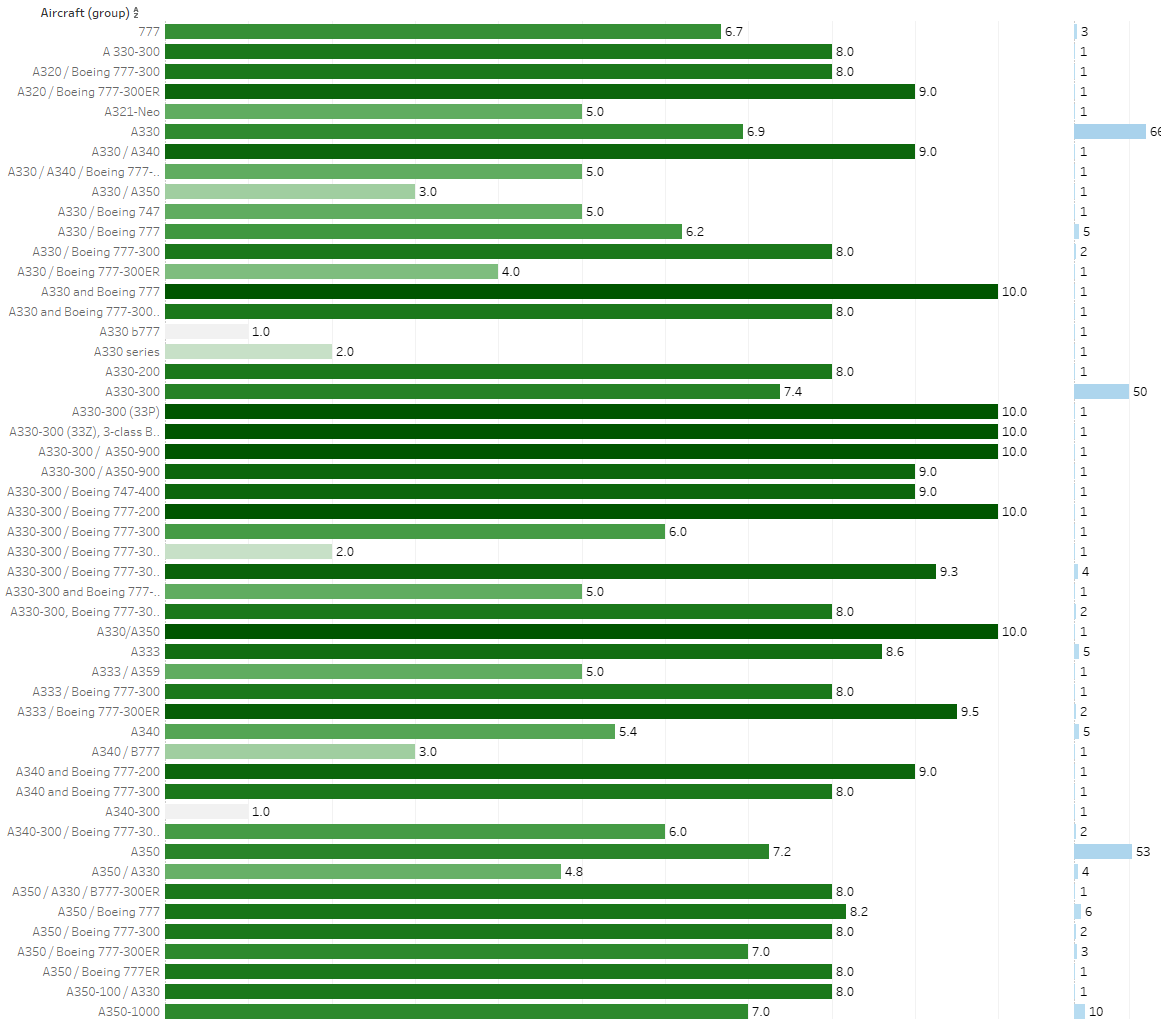

First, I want ro rename all the columns with missing aircraft as 'Unknown'. There are many reviews that did not fill out this section and for visualization purposes, I think it is better to see 'Unknown' rather than NaN. 

In [6]:
cathay_df['aircraft'] = cathay_df['aircraft'].fillna('Unknown').astype(str)

Looking at the rest of the responses, some had multiple aircraft types. For these, I decided to group these all together as a "Various". I also decided to group all the variations of Boeing 777, A330, and A350 together.

In [7]:
# Function to group the values together
def group_aircraft(row):
    # Responses that had more than one type of aircraft
    separators = ['/', ' and ', ', ', ' & ']
    if any(separator in row['aircraft'] for separator in separators):
        row['aircraft'] = 'Various'
    # Boeing 777
    if '777' in row['aircraft']:
        row['aircraft'] = 'Boeing 777'
    # Airbuses
    if '330' in row['aircraft']:
        row['aircraft'] = 'A330'
    if '340' in row['aircraft']:
        row['aircraft'] = 'A340'
    if '350' in row['aircraft']:
        row['aircraft'] = 'A350'
    return row

In [8]:
cathay_df = cathay_df.apply(group_aircraft, axis=1)
cathay_df['aircraft'].value_counts()

Unknown         768
Boeing 777      297
Various         133
A330            120
A350            107
A359              6
A340              6
A333              5
A321 neo          1
Boeing 773ER      1
A321-Neo          1
Boeing 77W        1
B77W              1
Boeing 747        1
Boeing 772        1
Name: aircraft, dtype: int64

There are still some other responses that we did not account for. Since there are so few of these, I will group these together as 'Other' in Tablaeu.

Now that the data has been cleaned up to a more usable state. We can export it can use it for our Tableau visualization

In [9]:
cathay_df.to_csv('cathay_data_mod.csv', index=False)